# Import libraries and load data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('../datasets/nba.csv')

# Data Exploration

In [3]:
# Get top 5 records, by default 5 records will fetch
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,NaN,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,NaN,6-10,231.0,NaN,5000000.0


In [4]:
# Get bottom 6 records
df.tail(6)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Get no.of columns and rows
df.shape

(458, 9)

In [6]:
# Get data information about data types and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      456 non-null    object 
 2   Number    457 non-null    float64
 3   Position  456 non-null    object 
 4   Age       456 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [7]:
# Get statistical summary, by default gives only mumeric columns
df.describe()

,Number,Age,Weight,Salary
count,457.000000,456.000000,457.000000,4.460000e+02
mean,17.678337,26.934211,221.522976,4.842684e+06
std,15.966090,4.407792,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


# Data Cleaning

### Handling missing data

In [8]:
# Detecting missing values, True for null
df.isnull()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False
455,False,False,False,False,False,False,False,True,False
456,False,False,False,False,False,False,False,False,False


In [9]:
# Detecting missing counts
df.isnull().sum()

Name         1
Team         2
Number       1
Position     2
Age          2
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [10]:
# Get only nan values for specific column
df[df["College"].isnull()]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
4,Jonas Jerebko,Boston Celtics,8.0,PF,NaN,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
15,Bojan Bogdanovic,NaN,44.0,SG,27.0,6-8,216.0,NaN,3425510.0
20,Sergey Karasev,Brooklyn Nets,10.0,SG,22.0,6-7,208.0,NaN,1599840.0
32,Thanasis Antetokounmpo,New York Knicks,43.0,SF,23.0,6-7,205.0,NaN,30888.0
...,...,...,...,...,...,...,...,...,...
447,Rudy Gobert,Utah Jazz,27.0,C,23.0,7-1,245.0,NaN,1175880.0
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,6-8,226.0,NaN,2050000.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


In [11]:
# Get only nan values for all column
df[df.isnull().any(axis=1)]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,NaN,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,NaN,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
15,Bojan Bogdanovic,NaN,44.0,SG,27.0,6-8,216.0,NaN,3425510.0
...,...,...,...,...,...,...,...,...,...
447,Rudy Gobert,Utah Jazz,27.0,C,23.0,7-1,245.0,NaN,1175880.0
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,6-8,226.0,NaN,2050000.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


In [12]:
# Dropping rows will all values are nan
df.dropna(how="all", inplace=True)
df.isnull().sum()

Name         0
Team         1
Number       0
Position     1
Age          1
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [13]:
# Drop missing values for specific columns
df.dropna(subset=["Name", "Team"], inplace=True)
df.isnull().sum()

Name         0
Team         0
Number       0
Position     1
Age          1
Height       0
Weight       0
College     83
Salary      11
dtype: int64

In [14]:
# Filling missing values
df["Age"] = df["Age"].fillna(df["Age"].mean())
df.isnull().sum()
df[df["Team"].isnull()]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary


In [15]:
# Filling values with forward fill
df["Position"] = df["Position"].ffill()
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     83
Salary      11
dtype: int64

In [16]:
df["Salary"] = df["Salary"].fillna(df["Salary"].mean())
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     83
Salary       0
dtype: int64

In [17]:
# Filling values with backward fill
df["College"] = df["College"].bfill()
df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

# Removing duplicates

In [18]:
# Getting duplicated rows
df[df.duplicated()]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary


In [19]:
# Get duplicated row count
df.duplicated().sum()

np.int64(0)

In [20]:
# Removing duplicates
df.drop_duplicates(subset=["Team", "Name"], keep='first')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.000000,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,25.000000,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,27.000000,6-5,205.0,Boston University,4.845869e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,22.000000,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.0,PF,26.934066,6-10,231.0,LSU,5.000000e+06
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.000000,6-10,234.0,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8.0,PG,26.000000,6-3,203.0,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25.0,PG,24.000000,6-1,179.0,Kansas,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21.0,C,26.000000,7-3,256.0,Kansas,2.900000e+06


# Data type conversion

In [21]:
# Convert to integer
df["Number"] = df["Number"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      456 non-null    object 
 1   Team      456 non-null    object 
 2   Number    456 non-null    int64  
 3   Position  456 non-null    object 
 4   Age       456 non-null    float64
 5   Height    456 non-null    object 
 6   Weight    456 non-null    float64
 7   College   456 non-null    object 
 8   Salary    456 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 35.6+ KB


In [22]:
# Convert to string
df["Name"] = df["Name"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      456 non-null    object 
 1   Team      456 non-null    object 
 2   Number    456 non-null    int64  
 3   Position  456 non-null    object 
 4   Age       456 non-null    float64
 5   Height    456 non-null    object 
 6   Weight    456 non-null    float64
 7   College   456 non-null    object 
 8   Salary    456 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 35.6+ KB


In [23]:
# Convert all to best dtypes
df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      456 non-null    object 
 1   Team      456 non-null    object 
 2   Number    456 non-null    int64  
 3   Position  456 non-null    object 
 4   Age       456 non-null    float64
 5   Height    456 non-null    object 
 6   Weight    456 non-null    float64
 7   College   456 non-null    object 
 8   Salary    456 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 35.6+ KB


# Renaming and Reshaping

In [24]:
# Renaming column names
df.rename(columns={'Name':'Student Name'}, inplace=True)

In [25]:
# Resetting index
df.reset_index(drop=True)

,Student Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25.000000,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25.000000,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27.000000,6-5,205.0,Boston University,4.845869e+06
3,R.J. Hunter,Boston Celtics,28,SG,22.000000,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,26.934066,6-10,231.0,LSU,5.000000e+06
...,...,...,...,...,...,...,...,...,...
451,Trey Lyles,Utah Jazz,41,PF,20.000000,6-10,234.0,Kentucky,2.239800e+06
452,Shelvin Mack,Utah Jazz,8,PG,26.000000,6-3,203.0,Butler,2.433333e+06
453,Raul Neto,Utah Jazz,25,PG,24.000000,6-1,179.0,Kansas,9.000000e+05
454,Tibor Pleiss,Utah Jazz,21,C,26.000000,7-3,256.0,Kansas,2.900000e+06


In [26]:
# Setting new index
df.set_index('Student Name')

,Team,Number,Position,Age,Height,Weight,College,Salary
Student Name,,,,,,,,
Avery Bradley,Boston Celtics,0,PG,25.000000,6-2,180.0,Texas,7.730337e+06
Jae Crowder,Boston Celtics,99,SF,25.000000,6-6,235.0,Marquette,6.796117e+06
John Holland,Boston Celtics,30,SG,27.000000,6-5,205.0,Boston University,4.845869e+06
R.J. Hunter,Boston Celtics,28,SG,22.000000,6-5,185.0,Georgia State,1.148640e+06
Jonas Jerebko,Boston Celtics,8,PF,26.934066,6-10,231.0,LSU,5.000000e+06
...,...,...,...,...,...,...,...,...
Trey Lyles,Utah Jazz,41,PF,20.000000,6-10,234.0,Kentucky,2.239800e+06
Shelvin Mack,Utah Jazz,8,PG,26.000000,6-3,203.0,Butler,2.433333e+06
Raul Neto,Utah Jazz,25,PG,24.000000,6-1,179.0,Kansas,9.000000e+05


# String Data cleaning

In [27]:
# Remove white spaces
df['Team'] = df['Team'].str.strip()
df.head()

,Student Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25.000000,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25.000000,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27.000000,6-5,205.0,Boston University,4.845869e+06
3,R.J. Hunter,Boston Celtics,28,SG,22.000000,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,26.934066,6-10,231.0,LSU,5.000000e+06


# Removing rows and columns

In [28]:
# Removing rows
df.drop([0, 1], axis=0, inplace=True)
df.head()

,Student Name,Team,Number,Position,Age,Height,Weight,College,Salary
2,John Holland,Boston Celtics,30,SG,27.000000,6-5,205.0,Boston University,4.845869e+06
3,R.J. Hunter,Boston Celtics,28,SG,22.000000,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,26.934066,6-10,231.0,LSU,5.000000e+06
5,Amir Johnson,Boston Celtics,90,PF,29.000000,6-9,240.0,LSU,1.200000e+07
6,Jordan Mickey,Boston Celtics,55,PF,21.000000,6-8,235.0,LSU,1.170960e+06


In [29]:
# Removing columns
df.drop(['Height'], axis=1, inplace=True)
df.head()

,Student Name,Team,Number,Position,Age,Weight,College,Salary
2,John Holland,Boston Celtics,30,SG,27.000000,205.0,Boston University,4.845869e+06
3,R.J. Hunter,Boston Celtics,28,SG,22.000000,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,26.934066,231.0,LSU,5.000000e+06
5,Amir Johnson,Boston Celtics,90,PF,29.000000,240.0,LSU,1.200000e+07
6,Jordan Mickey,Boston Celtics,55,PF,21.000000,235.0,LSU,1.170960e+06


# Outlier & Invalid Data Handling

In [30]:
age_df = df[df['Age'] > 30]
age_df

,Student Name,Team,Number,Position,Age,Weight,College,Salary
19,Jarrett Jack,Brooklyn Nets,2,PG,32.0,200.0,Georgia Tech,6300000.0
31,Lou Amundson,New York Knicks,17,PF,33.0,220.0,UNLV,1635476.0
33,Carmelo Anthony,New York Knicks,7,SF,32.0,240.0,Syracuse,22875000.0
34,Jose Calderon,New York Knicks,3,PG,34.0,200.0,Wichita State,7402812.0
43,Sasha Vujacic,New York Knicks,18,SG,32.0,195.0,Arizona,947276.0
...,...,...,...,...,...,...,...,...
406,Tayshaun Prince,Minnesota Timberwolves,12,SF,36.0,212.0,Kentucky,947276.0
413,Nick Collison,Oklahoma City Thunder,4,PF,35.0,255.0,Kansas,3750000.0
415,Randy Foye,Oklahoma City Thunder,6,SG,32.0,213.0,Villanova,3135000.0
420,Nazr Mohammed,Oklahoma City Thunder,13,C,38.0,250.0,Kentucky,222888.0


In [31]:
# Update age less then lower will become lower and bigger then upper will become upper
df['Age'] = df['Age'].clip(lower=30, upper=32)
df

,Student Name,Team,Number,Position,Age,Weight,College,Salary
2,John Holland,Boston Celtics,30,SG,30.0,205.0,Boston University,4.845869e+06
3,R.J. Hunter,Boston Celtics,28,SG,30.0,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,30.0,231.0,LSU,5.000000e+06
5,Amir Johnson,Boston Celtics,90,PF,30.0,240.0,LSU,1.200000e+07
6,Jordan Mickey,Boston Celtics,55,PF,30.0,235.0,LSU,1.170960e+06
...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,30.0,234.0,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8,PG,30.0,203.0,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,30.0,179.0,Kansas,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,30.0,256.0,Kansas,2.900000e+06


In [32]:
# Removing outliers with IQR
Q1 = df["Number"].quantile(0.25)
Q3 = df["Number"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df["Number"] >= lower) | (df["Number"] <= upper)]
df

,Student Name,Team,Number,Position,Age,Weight,College,Salary
2,John Holland,Boston Celtics,30,SG,30.0,205.0,Boston University,4.845869e+06
3,R.J. Hunter,Boston Celtics,28,SG,30.0,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,30.0,231.0,LSU,5.000000e+06
5,Amir Johnson,Boston Celtics,90,PF,30.0,240.0,LSU,1.200000e+07
6,Jordan Mickey,Boston Celtics,55,PF,30.0,235.0,LSU,1.170960e+06
...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,30.0,234.0,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8,PG,30.0,203.0,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,30.0,179.0,Kansas,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,30.0,256.0,Kansas,2.900000e+06


In [33]:
# Removing outliers with Z-score
z_score = (df["Weight"] - df["Weight"].mean()) / df["Weight"].std()
df = df[np.abs(z_score) <= 3]
df

,Student Name,Team,Number,Position,Age,Weight,College,Salary
2,John Holland,Boston Celtics,30,SG,30.0,205.0,Boston University,4.845869e+06
3,R.J. Hunter,Boston Celtics,28,SG,30.0,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,30.0,231.0,LSU,5.000000e+06
5,Amir Johnson,Boston Celtics,90,PF,30.0,240.0,LSU,1.200000e+07
6,Jordan Mickey,Boston Celtics,55,PF,30.0,235.0,LSU,1.170960e+06
...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,30.0,234.0,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8,PG,30.0,203.0,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,30.0,179.0,Kansas,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,30.0,256.0,Kansas,2.900000e+06


In [34]:
df.describe()

,Number,Age,Weight,Salary
count,453.000000,453.000000,453.000000,4.530000e+02
mean,17.487859,30.353201,221.408389,4.819183e+06
std,15.500013,0.730934,26.095614,5.174266e+06
min,0.000000,30.000000,161.000000,3.088800e+04
25%,5.000000,30.000000,200.000000,1.100000e+06
50%,13.000000,30.000000,220.000000,2.854940e+06
75%,25.000000,30.000000,240.000000,6.270000e+06
max,92.000000,32.000000,290.000000,2.500000e+07


In [35]:
df

,Student Name,Team,Number,Position,Age,Weight,College,Salary
2,John Holland,Boston Celtics,30,SG,30.0,205.0,Boston University,4.845869e+06
3,R.J. Hunter,Boston Celtics,28,SG,30.0,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,30.0,231.0,LSU,5.000000e+06
5,Amir Johnson,Boston Celtics,90,PF,30.0,240.0,LSU,1.200000e+07
6,Jordan Mickey,Boston Celtics,55,PF,30.0,235.0,LSU,1.170960e+06
...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,30.0,234.0,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8,PG,30.0,203.0,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,30.0,179.0,Kansas,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,30.0,256.0,Kansas,2.900000e+06


In [36]:
# Reset index after deleting some rows
df.reset_index(inplace=True)

In [37]:
df

,index,Student Name,Team,Number,Position,Age,Weight,College,Salary
0,2,John Holland,Boston Celtics,30,SG,30.0,205.0,Boston University,4.845869e+06
1,3,R.J. Hunter,Boston Celtics,28,SG,30.0,185.0,Georgia State,1.148640e+06
2,4,Jonas Jerebko,Boston Celtics,8,PF,30.0,231.0,LSU,5.000000e+06
3,5,Amir Johnson,Boston Celtics,90,PF,30.0,240.0,LSU,1.200000e+07
4,6,Jordan Mickey,Boston Celtics,55,PF,30.0,235.0,LSU,1.170960e+06
...,...,...,...,...,...,...,...,...,...
448,452,Trey Lyles,Utah Jazz,41,PF,30.0,234.0,Kentucky,2.239800e+06
449,453,Shelvin Mack,Utah Jazz,8,PG,30.0,203.0,Butler,2.433333e+06
450,454,Raul Neto,Utah Jazz,25,PG,30.0,179.0,Kansas,9.000000e+05
451,455,Tibor Pleiss,Utah Jazz,21,C,30.0,256.0,Kansas,2.900000e+06


In [38]:
df.isnull().sum()

index           0
Student Name    0
Team            0
Number          0
Position        0
Age             0
Weight          0
College         0
Salary          0
dtype: int64

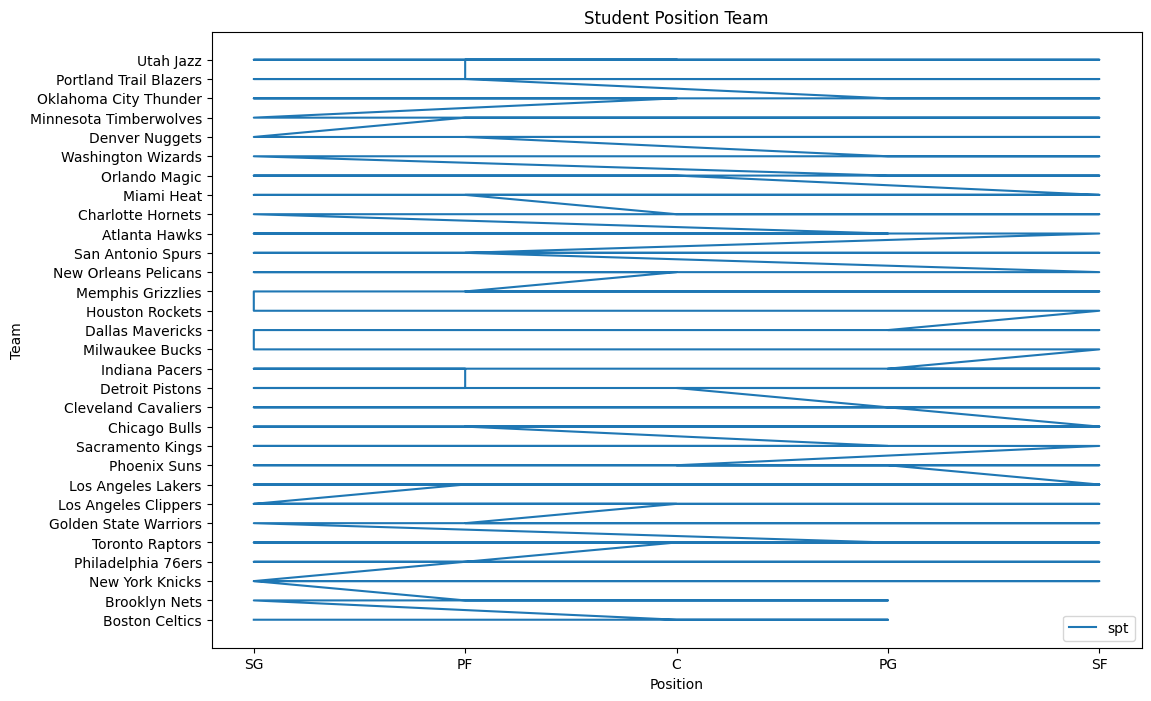

In [39]:
# line graph
plt.figure(figsize=(12,8))

plt.plot(df["Position"], df["Team"], label="spt")

plt.xlabel("Position")
plt.ylabel("Team")
plt.title("Student Position Team")

plt.legend()
plt.show()

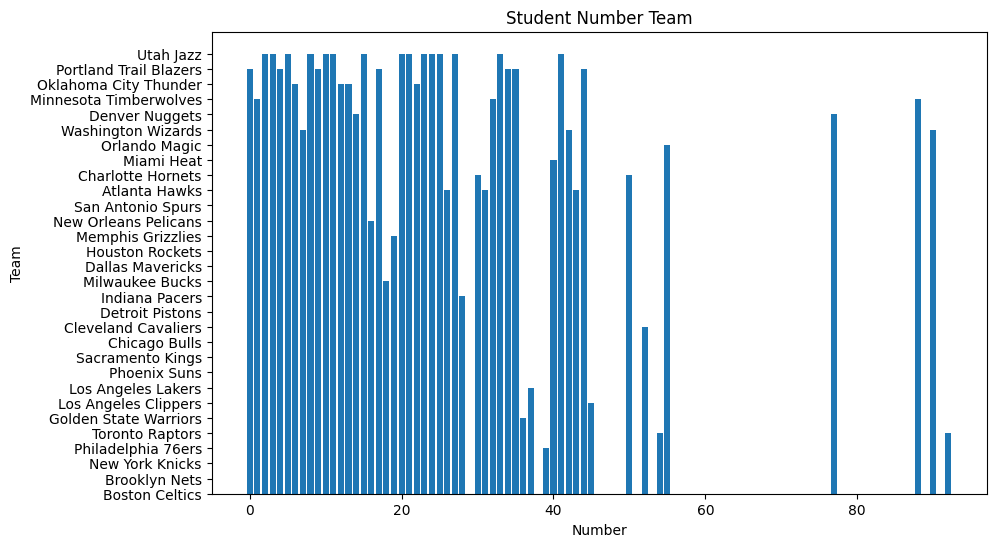

In [40]:
# Bar graph
plt.figure(figsize=(10, 6))

plt.bar(df["Number"], df["Team"])
plt.xlabel("Number")
plt.ylabel("Team")
plt.title("Student Number Team")

plt.show()

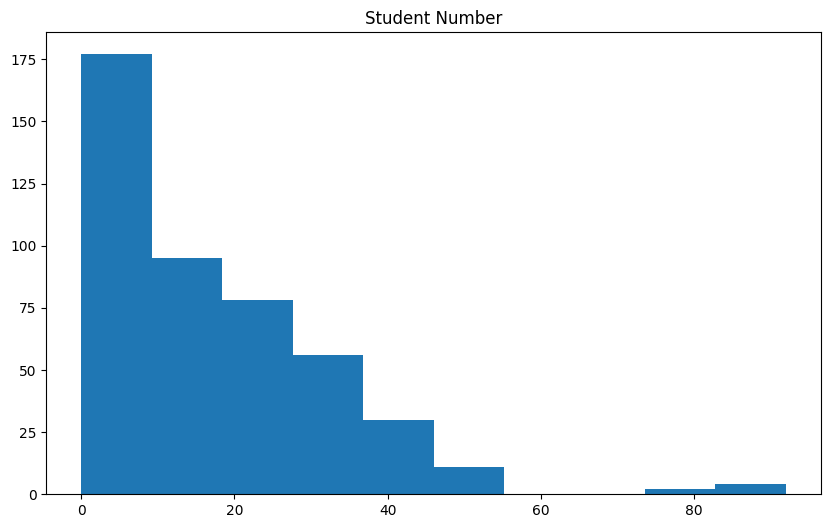

In [41]:
plt.figure(figsize=(10, 6))

plt.hist(df["Number"], bins=10)
plt.title('Student Number')

plt.show()

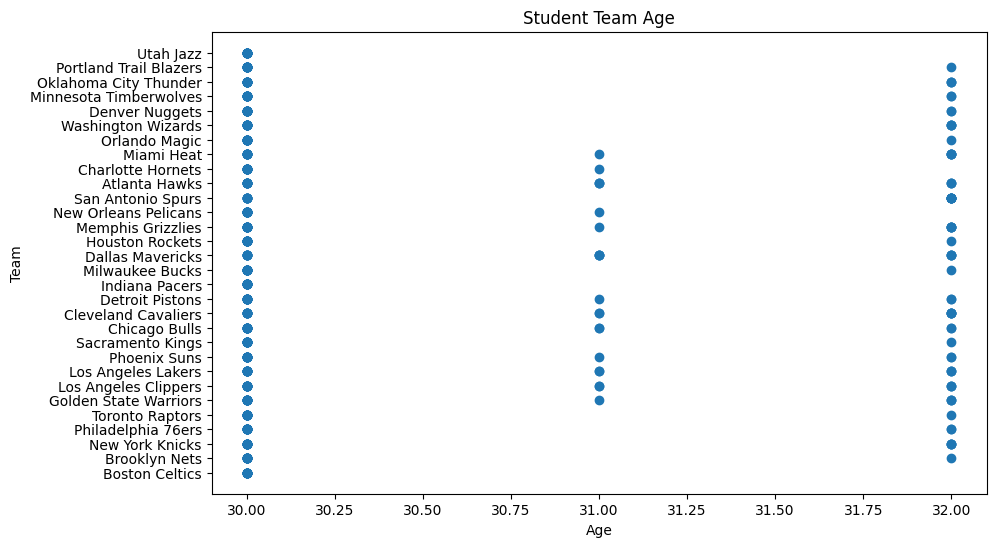

In [43]:
plt.figure(figsize=(10, 6))

plt.scatter(df["Age"], df["Team"])
plt.xlabel('Age')
plt.ylabel('Team')
plt.title('Student Team Age')

plt.show()